
## 01MIAR - Actividad Video Valencia Pollution

## Alumno
Peralta Rodrigo

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 29/11/2024 00:00 - 29/11/2024 23:59

#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- parámetros: parámetroe medidos
- mediciones: fichero de mediciones
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire
- fiwareid: 
- geo_shape: coordenadas geográficas
- geo_point_2d: latitud-longitud

In [ ]:
import os
from os import path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## 01
Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [35]:
# Read the CSV file and display its content
res = os.path.join('res','valencia_pollution_dataset.csv')
df = pd.read_csv(res, sep=',', header=0, index_col=False, engine='python')

display(df.head(5))
display(df.info()) 
display(df.describe(include='all'))

,objectid,nombre,direccion,tipozona,parametros,mediciones,so2,no2,o3,co,pm10,pm25,tipoemision,fecha_carga,calidad_ambiental,fiwareid,geo_shape,geo_point_2d
0,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,NaN,NaN,0.0,10,71.0,0.7,8.0,3.0,Tráfico,2025-05-24T20:20:06+00:00,Razonablemente Buena,NaN,NaN,NaN
1,28,Viveros,Jardines de Viveros,Urbana,NaN,NaN,0.0,5,88.0,NaN,NaN,NaN,Fondo,2025-05-24T20:20:08+00:00,Razonablemente Buena,NaN,NaN,NaN
2,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,NaN,NaN,NaN,24,NaN,NaN,20.0,11.0,Tráfico,2025-05-24T20:20:11+00:00,Razonablemente Buena,NaN,NaN,NaN
3,432,Patraix,"Archiduque Carlos, 84ac",Urbana,NaN,NaN,NaN,15,NaN,NaN,20.0,11.0,Tráfico,2025-05-24T20:20:12+00:00,Razonablemente Buena,NaN,NaN,NaN
4,23,Francia,"Avda. de Francia, 60",Urbana,NaN,NaN,1.0,3,82.0,0.1,9.0,6.0,Tráfico,2025-05-24T20:20:04+00:00,Razonablemente Buena,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   objectid           396 non-null    int64  
 1   nombre             396 non-null    object 
 2   direccion          396 non-null    object 
 3   tipozona           396 non-null    object 
 4   parametros         0 non-null      float64
 5   mediciones         0 non-null      float64
 6   so2                216 non-null    float64
 7   no2                396 non-null    int64  
 8   o3                 216 non-null    float64
 9   co                 108 non-null    float64
 10  pm10               288 non-null    float64
 11  pm25               288 non-null    float64
 12  tipoemision        396 non-null    object 
 13  fecha_carga        396 non-null    object 
 14  calidad_ambiental  396 non-null    object 
 15  fiwareid           0 non-null      float64
 16  geo_shape          0 non-n

None

,objectid,nombre,direccion,tipozona,parametros,mediciones,so2,no2,o3,co,pm10,pm25,tipoemision,fecha_carga,calidad_ambiental,fiwareid,geo_shape,geo_point_2d
count,396.000000,396,396,396,0.0,0.0,216.000000,396.000000,216.0000,108.000000,288.000000,288.000000,396,396,396,0.0,0.0,0.0
unique,NaN,11,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,315,2,NaN,NaN,NaN
top,NaN,Pista de Silla,"C/ Filipinas, s/n",Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tráfico,2025-05-26T10:20:07+00:00,Razonablemente Buena,NaN,NaN,NaN
freq,NaN,36,36,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288,2,296,NaN,NaN,NaN
mean,208.818182,NaN,NaN,NaN,NaN,NaN,1.449074,8.921717,71.0000,0.366667,14.687500,8.031250,NaN,NaN,NaN,NaN,NaN,NaN
std,264.784847,NaN,NaN,NaN,NaN,NaN,1.400066,6.453058,13.0662,0.250607,6.258061,3.224859,NaN,NaN,NaN,NaN,NaN,NaN
min,22.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,36.0000,0.100000,6.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,24.000000,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000,63.0000,0.100000,7.000000,5.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,27.000000,NaN,NaN,NaN,NaN,NaN,1.000000,7.000000,75.0000,0.300000,16.500000,8.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,431.000000,NaN,NaN,NaN,NaN,NaN,2.000000,12.000000,81.0000,0.700000,19.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN


## 02
- ¿Cuál es el rango temporal del dataset?
- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

In [ ]:
# Convert to datetime
df['fecha_carga'] = pd.to_datetime(df['fecha_carga'])

# Format'YYYY-MM-DD HH:MM:SS'
df['fecha_carga_str'] = df['fecha_carga'].dt.strftime('%Y-%m-%d %H:%M:%S') # This returns a str so better to put it in a new column


# Display the oldest and newest dates in the dataset
oldest_date = df['fecha_carga_str'].min()
newest_date = df['fecha_carga_str'].max()
print(f'Rango temporal del dataset: {oldest_date} - {newest_date}')



Rango temporal del dataset: 2025-05-24 20:20:04 - 2025-05-26 10:20:13


In [70]:
# Count the unique number of stattion which have co
# Locate the ones with CO measurements, count the unique 'objectid's
co_station_count = df.loc[df['co'].notnull(), 'objectid'].nunique()
print(f'Número de estaciones con medidores de Monoxido de Carbono (CO): {co_station_count}')

Número de estaciones con medidores de Monoxido de Carbono (CO): 3


## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono

In [ ]:
# Find the stattion with the highest mean co measurement

# Group by 'objectid' and calculate the mean of 'co', then find the station with the maximum mean value
co_station = df.groupby('objectid')['co'].mean().idxmax()
# Get the mean value and the name of the station
co_value = df.groupby('objectid')['co'].mean().max()
name = df.loc[df['objectid'] == co_station, 'nombre'].values[0]

print(f'Estación con el valor medio más alto de CO: {co_station} - {name} - ({co_value:.2f} ppm)')


Estación con el valor medio más alto de CO: 26 - Pista de Silla - (0.70 ppm)


## 04
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

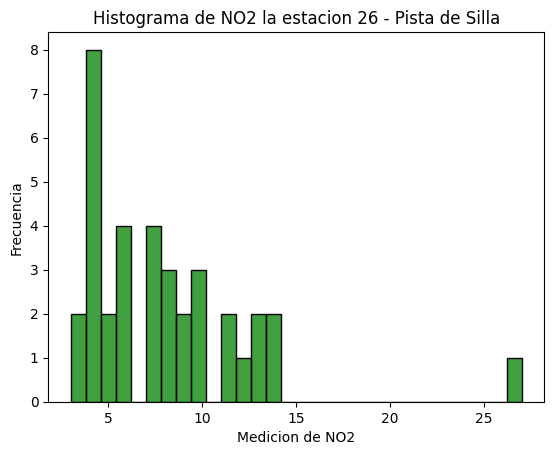

In [74]:
# Filter data for the intended station
station_data = df[df['objectid'] == co_station]

# Plot histogram of NO2 measurements
sns.histplot(station_data['no2'].dropna(), bins=30, color='green', edgecolor='black')
plt.title(f'Histograma de NO2 la estacion {co_station} - {name}')
plt.xlabel('Medicion de NO2')
plt.ylabel('Frecuencia')
plt.show()

## 05
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

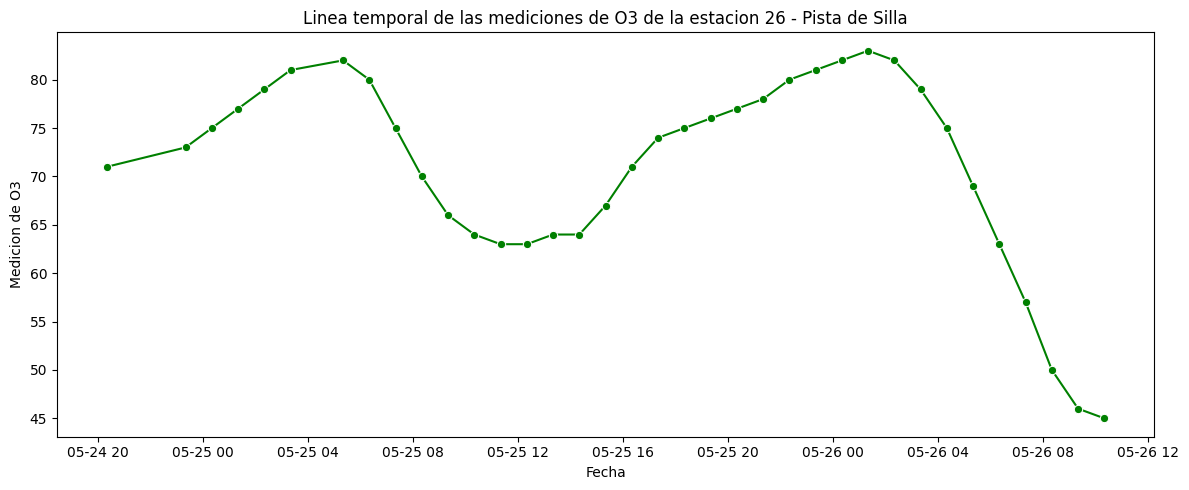

In [76]:
# Date Type was already changed when I calculated the time range...

# Plot temporal line for O3 measurements
plt.figure(figsize=(12, 5))
sns.lineplot(data=station_data, x='fecha_carga', y='o3', marker='o', color='green')
plt.title(f'Linea temporal de las mediciones de O3 de la estacion {co_station} - {name}')
plt.xlabel('Fecha')
plt.ylabel('Medicion de O3')
plt.tight_layout()
plt.show()

